In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split, cross_val_score

# 1.Data Preprocessing

In [4]:
#Loading .csv file
df = pd.read_csv('/kaggle/input/employee-attrition/employee attrition.csv')
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [5]:
print(f'Rows for each employee: {df.shape[0]}')
print(f'Columns for each employee: {df.shape[1]}')


Rows for each employee: 1470
Columns for each employee: 35


In [6]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Display summary statistics of numerical columns
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [8]:
#Removing unwanted columns
df = df.drop(['EmployeeCount',
                 'EmployeeNumber',
                 'Over18',
                  'StandardHours'],axis = 1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Encoding Categorical Features

In [9]:
col = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction']

for i in df['Education']:
    df['Education'].replace({1:'Below College',2:'College',3:'Bachelor',4:'Master', 5:'Doctor'},
                       inplace = True)
    
for i in df['PerformanceRating']:
    df['PerformanceRating'].replace({1:'Low', 2:'Good',3:'Excellent',4:'Outstanding'},
                                  inplace = True)
    
for i in df['WorkLifeBalance']:
    df['WorkLifeBalance'].replace({1: 'Bad', 2:'Good', 3:'Better', 4:'Best'}, 
                                  inplace = True)

for i in df[col]:
    df[i].replace({1:'Low', 2:'Medium',3:'High', 4:'Very High'},
                   inplace = True)

/tmp/ipykernel_33/3439142566.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education'].replace({1:'Below College',2:'College',3:'Bachelor',4:'Master', 5:'Doctor'},
/tmp/ipykernel_33/3439142566.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [10]:
# Checking new values for decoded attributes 
decoded = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction',
           'Education', 'PerformanceRating', 'WorkLifeBalance']

for i in df[decoded]:
    print(df[i].value_counts().sort_values(ascending=False))
    print('- - ' * 10)

EnvironmentSatisfaction
High         453
Very High    446
Medium       287
Low          284
Name: count, dtype: int64
- - - - - - - - - - - - - - - - - - - - 
JobInvolvement
High         868
Medium       375
Very High    144
Low           83
Name: count, dtype: int64
- - - - - - - - - - - - - - - - - - - - 
JobSatisfaction
Very High    459
High         442
Low          289
Medium       280
Name: count, dtype: int64
- - - - - - - - - - - - - - - - - - - - 
RelationshipSatisfaction
High         459
Very High    432
Medium       303
Low          276
Name: count, dtype: int64
- - - - - - - - - - - - - - - - - - - - 
Education
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: count, dtype: int64
- - - - - - - - - - - - - - - - - - - - 
PerformanceRating
Excellent      1244
Outstanding     226
Name: count, dtype: int64
- - - - - - - - - - - - - - - - - - - - 
WorkLifeBalance
Better    893
Good      344
Best      153
Bad        80
N

In [11]:
# Handling missing values: First check
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [34]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.3 MB/s eta 0:00:00:00:0100:01


# Exploratory Data Analysis

In [12]:
# Visualizing target variable classes
import plotly.express as px
fig = px.pie(df, names = 'Attrition', title = 'Target Variable: Attrition')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent+label")
fig.show();

In [13]:
Attrition = df.query("Attrition == 'Yes'")
Attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,Bachelor,Life Sciences,High,Male,...,Excellent,Medium,0,6,4,Better,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,Master,Life Sciences,High,Male,...,Outstanding,Medium,0,10,4,Better,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,Below College,Medical,Medium,Male,...,Excellent,High,0,8,2,Better,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,Bachelor,Marketing,Very High,Male,...,Excellent,Low,1,1,3,Good,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,Master,Medical,Low,Male,...,Excellent,Medium,3,4,3,Best,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,College,Technical Degree,Very High,Male,...,Excellent,Very High,1,14,4,Bad,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,Master,Life Sciences,Medium,Male,...,Excellent,Very High,2,12,3,Better,6,3,0,1


In [14]:
#finding patterns: check how many left the company
print(f"{Attrition.shape[0]} emplyees in the dataset left the company.\n")

237 emplyees in the dataset left the company.



In [15]:
# Categorical: comparisons to find pattern between attrition and all other columns
def barplot(i):
    fig = px.histogram(Attrition, x = Attrition[i], template = 'plotly_dark',
                      title = f'{i} x Attrition', text_auto = 'd3-format')
    fig.show()
barplot('BusinessTravel')
barplot('Department')
barplot('Education')
barplot('EnvironmentSatisfaction')
barplot('EducationField')
barplot('Gender')
barplot('JobInvolvement')
barplot('JobSatisfaction')
barplot('WorkLifeBalance')
barplot('PerformanceRating')
barplot('JobRole')
barplot('MaritalStatus')
barplot('RelationshipSatisfaction')
barplot('OverTime')

# Conclusions from Categorical Variables Analysis
* Most employees who **left** were from the **Research & Development department**
* Common roles of **departing employees**: **laboratory technicians, sales executives, research scientists**
* **Departing employees** had **excellent performance ratings**
* Majority had **Bachelor's degrees**, primarily in **Life Sciences, Medical, or Marketing fields**
* • Departing employees generally showed:
    1. High job involvement 
    2. High job satisfaction
    3. Better work-life balance
* A large number reported **low satisfaction** with the work **environment**

In [15]:
#Numerical: 
def numeric_plot(i):
    fig = px.histogram(Attrition, x = Attrition[i], nbins  = 20, template = 'plotly_dark',
                      title = f'{i} x Attrition')
    fig.show()

In [16]:
numeric_plot('Age')
numeric_plot('DailyRate')
numeric_plot('DistanceFromHome')
numeric_plot('HourlyRate')
numeric_plot('JobLevel')
numeric_plot('MonthlyIncome')
numeric_plot('MonthlyRate')
numeric_plot('NumCompaniesWorked')
numeric_plot('PercentSalaryHike')
numeric_plot('StockOptionLevel')
numeric_plot('TotalWorkingYears')
numeric_plot('TrainingTimesLastYear')
numeric_plot('YearsAtCompany')
numeric_plot('YearsInCurrentRole')
numeric_plot('YearsSinceLastPromotion')
numeric_plot('YearsWithCurrManager')

# Conclusions from Numerical Variables Analysis
* Age and attrition:
Employees aged 25-35 have the highest attrition rates
Attrition decreases as employees get older
* Tenure and attrition:
Employees with fewer years at the company are more likely to leave
Attrition decreases with more years in current role and total work experience
* Income and attrition:
Majority of departing employees had monthly incomes between 2000-3000
Lower percentage salary hikes correlate with higher attrition
* Career stage:
Most departing employees were early in their careers (less than 10 years total work experience)
* Management relationship:
Many departing employees had less than 2 years working with their last manager
***Overall pattern:**
****Attrition is highest among younger, less experienced employees with lower incomes and shorter tenures
Attrition decreases with age, experience, higher income, and longer company tenure****

<Axes: >

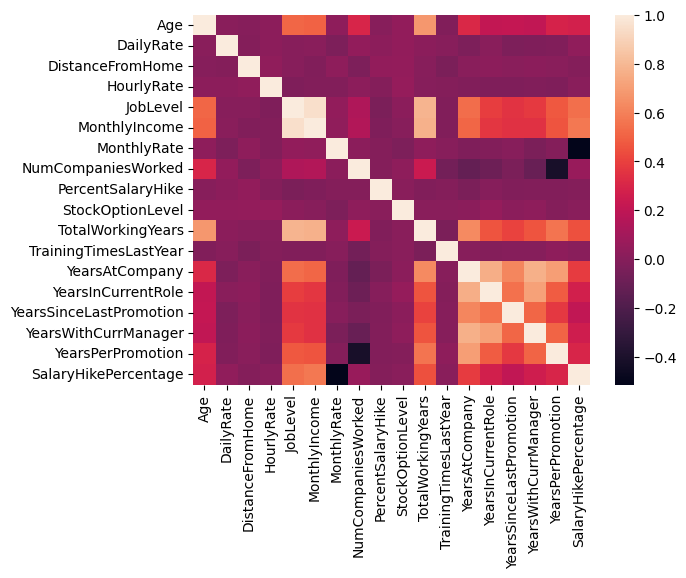

In [62]:
#since correlation heatmap is missing
import seaborn as sns
%matplotlib inline
corr = df.select_dtypes('number').corr()
sns.heatmap(corr)

# Observations from basic EDA
* Age and DistanceFromHome show moderate positive correlation.
* JobSatisfaction correlates positively with EnvironmentSatisfaction.
* MonthlyRate has strong positive correlation with YearsAtCompany and YearsSinceLastPromotion.
* TrainingTimesLastYear correlates positively with YearsAtCompany and YearsSinceLastPromotion.
* StockOptionLevel shows negative correlation with JobSatisfaction.
* PercentSalaryHike has weak correlations with most variables.
* RelationshipSatisfaction shows little correlation with other factors.
* EmployeeCount appears to have no significant correlations.
* JobInvolvement has weak to moderate correlations with several variables.

# 2.Feature Engineering

In [17]:
# 1. Years per promotion
df['YearsPerPromotion'] = df['TotalWorkingYears'] / (df['NumCompaniesWorked'] + 1)

# 2. Salary hike percentage (using safe division)
df['SalaryHikePercentage'] = np.where(
    df['MonthlyRate'] != 0,
    (df['MonthlyIncome'] - df['MonthlyRate']) / df['MonthlyRate'] * 100,
    0
)

In [18]:
# Display the first few rows of the dataset with new features
print(df[['YearsPerPromotion', 'SalaryHikePercentage']].head())

# Display summary statistics of the new features
print(df[['YearsPerPromotion', 'SalaryHikePercentage']].describe())

   YearsPerPromotion  SalaryHikePercentage
0           0.888889            -69.233534
1           5.000000            -79.403381
2           1.000000            -12.771285
3           4.000000            -87.439009
4           0.600000            -79.148629
       YearsPerPromotion  SalaryHikePercentage
count        1470.000000           1470.000000
mean            4.193478            -33.082105
std             4.035504             84.209929
min             0.000000            -96.262825
25%             1.600000            -77.932986
50%             3.000000            -60.319155
75%             5.000000            -21.562278
max            38.000000            817.741176


# Justification  for Features to improve Model Perfomance:

**YearsPerPromotion:**
    Mean: 4.19 years, with a standard deviation of 4.04 years
    Range: 0 to 38 years
This feature captures the average time an employee spends before receiving a promotion. It can improve model performance by:
* **a) Identifying career growth patterns:** Employees with lower values might be on a fast track, potentially reducing attrition risk.
* **b) Revealing company promotion practices:** It helps the model understand the typical career progression timeline, which can be a significant factor in employee satisfaction and retention.
* **c) Differentiating between job roles:** Different positions may have varying promotion timelines, allowing the model to account for role-specific attrition risks.

**SalaryHikePercentage:**
    Mean: -33.08%, with a standard deviation of 84.21%
    Range: -96.26% to 817.74%
It can enhance model performance by:
* **a) Quantifying recent compensation changes:** Large positive percentages might indicate recent promotions or significant raises, potentially lowering attrition risk. Negative values could signal dissatisfaction with compensation, increasing attrition likelihood.
* **b) Capturing salary competitiveness:** It helps the model understand how an employee's current compensation compares to their market value or previous earnings, a crucial factor in job satisfaction and retention.
* **c) Identifying potential flight risks:** Employees with large negative percentages might be more likely to seek opportunities elsewhere, allowing the model to flag high-risk cases.


# Splitting Training(80) and Testing(20) Dataset

In [19]:
X = df.drop('Attrition', axis = 1)
y = df.Attrition
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print('X train size: ', len(X_train))
print('X test size: ', len(X_test))
print('y train size: ', len(y_train))
print('y test size: ', len(y_test))

X train size:  1176
X test size:  294
y train size:  1176
y test size:  294


# Encoding all categorical variables using both Ordinal Encoder and the One Hot Encoder


Ordinal Encoder assumes an ordering of categories. So, for instance, when encoding Relationship Satisfaction, the encoding will assume that 'Low (0)' is lesser than 'Very High(3)'.


The One Hot Encoder, will create new columns indicating the presence or absence of each possible value for every categorical attribute in our dataset, with binary values where 0 indicates the absence of each value and 1 indicates the presence of each value.


Categories such as Education and Job Involvement can easily be encoded with the Ordinal Encoder since there is some sort of hierarchy among their values, but Department, for instance, would be better encoded with the One Hot Encoder, since there is no department lesser or more than another.

In [20]:
# Enoding categorical variables with Ordinal Encoder
OE = OrdinalEncoder()
columns_OE = ['BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
             'JobSatisfaction','WorkLifeBalance','PerformanceRating','RelationshipSatisfaction']
X_train[columns_OE] = OE.fit_transform(X_train[columns_OE])
X_test[columns_OE] = OE.transform(X_test[columns_OE])
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsPerPromotion,SalaryHikePercentage
721,50,2.0,939,Research & Development,24,0.0,Life Sciences,3.0,Male,95,...,1,22,2,2.0,12,11,1,5,5.500000,235.808700
520,48,2.0,817,Sales,2,1.0,Marketing,2.0,Male,56,...,0,12,3,2.0,2,2,2,2,3.000000,-56.337044
379,55,2.0,1311,Research & Development,2,0.0,Life Sciences,0.0,Female,97,...,0,30,2,2.0,5,4,1,2,10.000000,-28.373033
184,53,2.0,1084,Research & Development,13,2.0,Medical,3.0,Female,57,...,2,5,3,2.0,4,2,1,3,2.500000,-83.047619
213,51,2.0,1469,Research & Development,8,4.0,Life Sciences,2.0,Male,81,...,2,16,5,0.0,10,9,4,7,2.666667,-20.627860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,37,0.0,1040,Research & Development,2,2.0,Life Sciences,0.0,Male,100,...,1,17,2,1.0,1,0,0,0,2.833333,-67.425868
1380,35,2.0,682,Sales,18,4.0,Medical,2.0,Male,71,...,1,6,2,0.0,5,3,0,4,6.000000,-65.189358
798,33,2.0,1017,Research & Development,25,0.0,Medical,1.0,Male,55,...,0,5,0,2.0,2,2,2,2,1.000000,-22.719679
1189,33,2.0,392,Sales,2,4.0,Medical,3.0,Male,93,...,2,6,5,2.0,6,2,0,4,3.000000,40.397858


In [21]:
# Transforming bicategoric variables into binary values
X_train['OverTime'].replace({'Yes': 1,
                                      'No':0}, inplace=True)
X_test['OverTime'].replace({'Yes': 1,
                                      'No':0}, inplace=True)
X_train['Gender'].replace({'Male': 1,
                                      'Female':0}, inplace=True)
X_test['Gender'].replace({'Male': 1,
                                      'Female':0}, inplace=True)

/tmp/ipykernel_32/2683544446.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_32/2683544446.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_32/2683544446.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignme

In [22]:
X_train.OverTime.value_counts()

OverTime
0    835
1    341
Name: count, dtype: int64

In [23]:
X_test.Gender.value_counts()

Gender
1    183
0    111
Name: count, dtype: int64

In [24]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsPerPromotion,SalaryHikePercentage
721,50,2.0,939,Research & Development,24,0.0,Life Sciences,3.0,1,95,...,1,22,2,2.0,12,11,1,5,5.500000,235.808700
520,48,2.0,817,Sales,2,1.0,Marketing,2.0,1,56,...,0,12,3,2.0,2,2,2,2,3.000000,-56.337044
379,55,2.0,1311,Research & Development,2,0.0,Life Sciences,0.0,0,97,...,0,30,2,2.0,5,4,1,2,10.000000,-28.373033
184,53,2.0,1084,Research & Development,13,2.0,Medical,3.0,0,57,...,2,5,3,2.0,4,2,1,3,2.500000,-83.047619
213,51,2.0,1469,Research & Development,8,4.0,Life Sciences,2.0,1,81,...,2,16,5,0.0,10,9,4,7,2.666667,-20.627860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,37,0.0,1040,Research & Development,2,2.0,Life Sciences,0.0,1,100,...,1,17,2,1.0,1,0,0,0,2.833333,-67.425868
1380,35,2.0,682,Sales,18,4.0,Medical,2.0,1,71,...,1,6,2,0.0,5,3,0,4,6.000000,-65.189358
798,33,2.0,1017,Research & Development,25,0.0,Medical,1.0,1,55,...,0,5,0,2.0,2,2,2,2,1.000000,-22.719679
1189,33,2.0,392,Sales,2,4.0,Medical,3.0,1,93,...,2,6,5,2.0,6,2,0,4,3.000000,40.397858


In [28]:
print(X_train.columns)

Index([                     'Age',           'BusinessTravel',
                      'DailyRate',         'DistanceFromHome',
                      'Education',  'EnvironmentSatisfaction',
                         'Gender',               'HourlyRate',
                 'JobInvolvement',                 'JobLevel',
                'JobSatisfaction',            'MonthlyIncome',
                    'MonthlyRate',       'NumCompaniesWorked',
                       'OverTime',        'PercentSalaryHike',
              'PerformanceRating', 'RelationshipSatisfaction',
               'StockOptionLevel',        'TotalWorkingYears',
          'TrainingTimesLastYear',          'WorkLifeBalance',
                 'YearsAtCompany',       'YearsInCurrentRole',
        'YearsSinceLastPromotion',     'YearsWithCurrManager',
              'YearsPerPromotion',     'SalaryHikePercentage',
                                0,                          1,
                                2,                     

In [29]:
# Rescaling Data
Scaler = MinMaxScaler()
Scaling_Cols = ['TrainingTimesLastYear','YearsAtCompany','TotalWorkingYears',
               'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
               'PercentSalaryHike','Age','DailyRate','DistanceFromHome','HourlyRate',
               'MonthlyIncome','MonthlyRate','NumCompaniesWorked']
X_train[Scaling_Cols] = Scaler.fit_transform(X_train[Scaling_Cols])
X_test[Scaling_Cols] = Scaler.transform(X_test[Scaling_Cols])
X_train

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,11,12,13,14,15,16,17,18,19,20
721,0.761905,2.0,0.599141,0.821429,0.0,3.0,1,0.928571,0.0,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
520,0.714286,2.0,0.511811,0.035714,1.0,2.0,1,0.371429,3.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
379,0.880952,2.0,0.865426,0.035714,0.0,0.0,0,0.957143,0.0,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
184,0.833333,2.0,0.702935,0.428571,2.0,3.0,0,0.385714,3.0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
213,0.785714,2.0,0.978525,0.250000,4.0,2.0,1,0.728571,2.0,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.452381,0.0,0.671439,0.035714,2.0,0.0,1,1.000000,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1380,0.404762,2.0,0.415175,0.607143,4.0,2.0,1,0.585714,0.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
798,0.357143,2.0,0.654975,0.857143,0.0,1.0,1,0.357143,2.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1189,0.357143,2.0,0.207588,0.035714,4.0,3.0,1,0.900000,0.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [30]:
# Changing y values
print(y_train.value_counts())
print(y_test.value_counts())

Attrition
No     983
Yes    193
Name: count, dtype: int64
Attrition
No     250
Yes     44
Name: count, dtype: int64


In [31]:

y_train.replace({'No':0,
                'Yes':1}, inplace = True)
y_test.replace({'No':0,
                'Yes':1}, inplace = True)

/tmp/ipykernel_32/4088030379.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_32/4088030379.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [32]:
print(y_train.value_counts())
print(y_test.value_counts())

Attrition
0    983
1    193
Name: count, dtype: int64
Attrition
0    250
1     44
Name: count, dtype: int64


# Training 4 models - Decision Tree, RandomForest, AdaBoost, GradientBoost

In [34]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [37]:
adaboost = AdaBoostClassifier()
randomforest = RandomForestClassifier()
gradientboosting = GradientBoostingClassifier()
decisiontree = DecisionTreeClassifier()
xgboost =  XGBClassifier()

In [39]:
X.columns = X.columns.astype(str) 

In [41]:
# Creating a function for predictions
def predict(model):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y_test, y_predict) * 100))
    print('Recall: %.2f%%' % (recall_score(y_test, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y_test, y_predict) * 100))
    confusion_matrix_model = confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

In [43]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Decision Tree

Accuracy: 78.57%
Precision: 29.79%
Recall: 31.82%
F1_Score: 30.77%


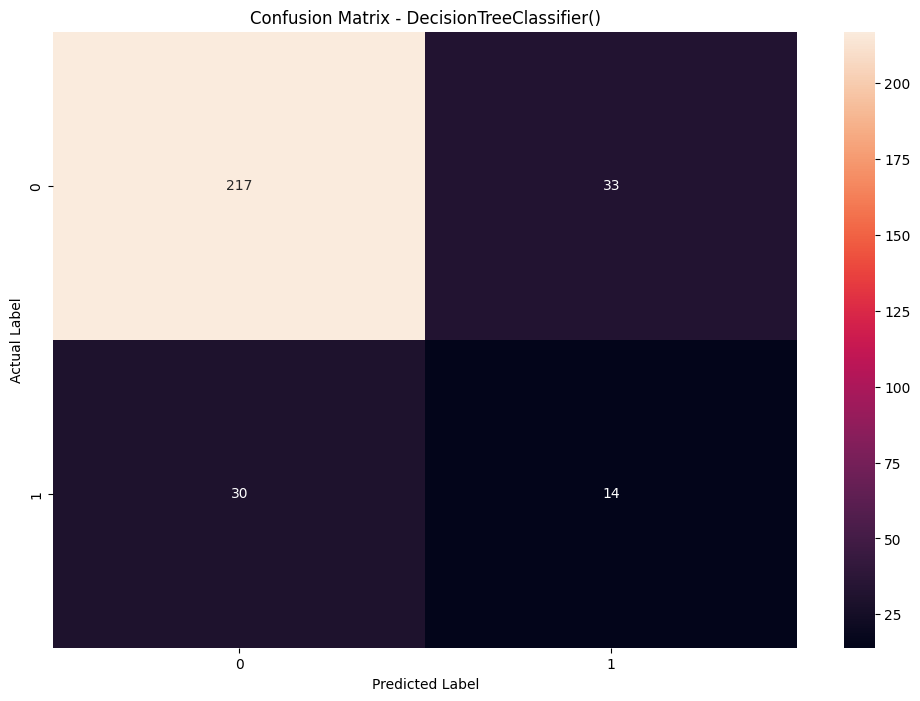

In [44]:
predict(decisiontree)

# Random Forest

Accuracy: 85.03%
Precision: 50.00%
Recall: 9.09%
F1_Score: 15.38%


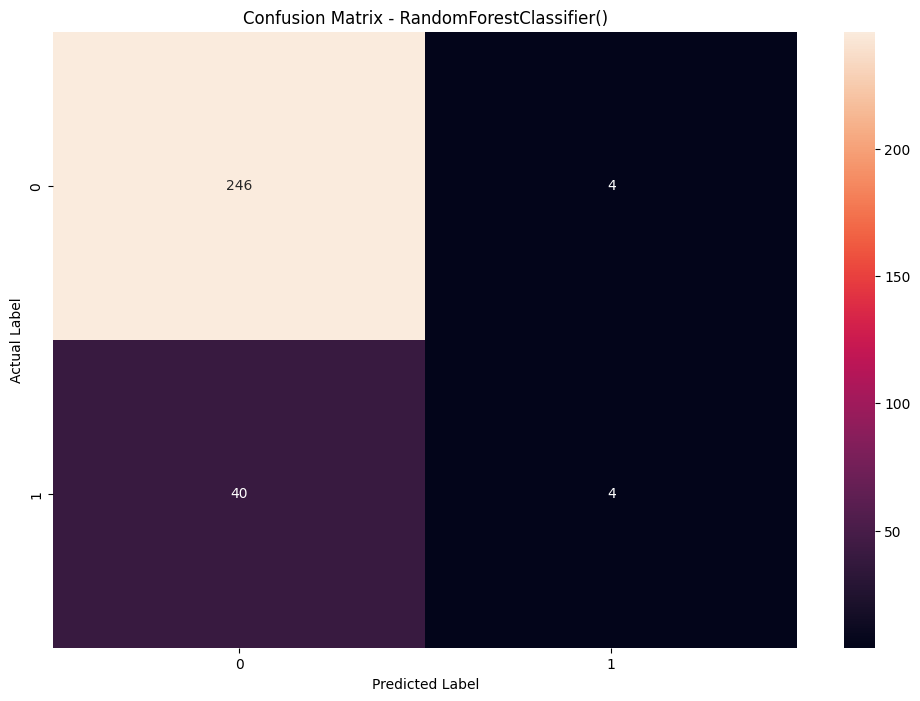

In [45]:
predict(randomforest)

# Gradient Boost

Accuracy: 86.39%
Precision: 61.11%
Recall: 25.00%
F1_Score: 35.48%


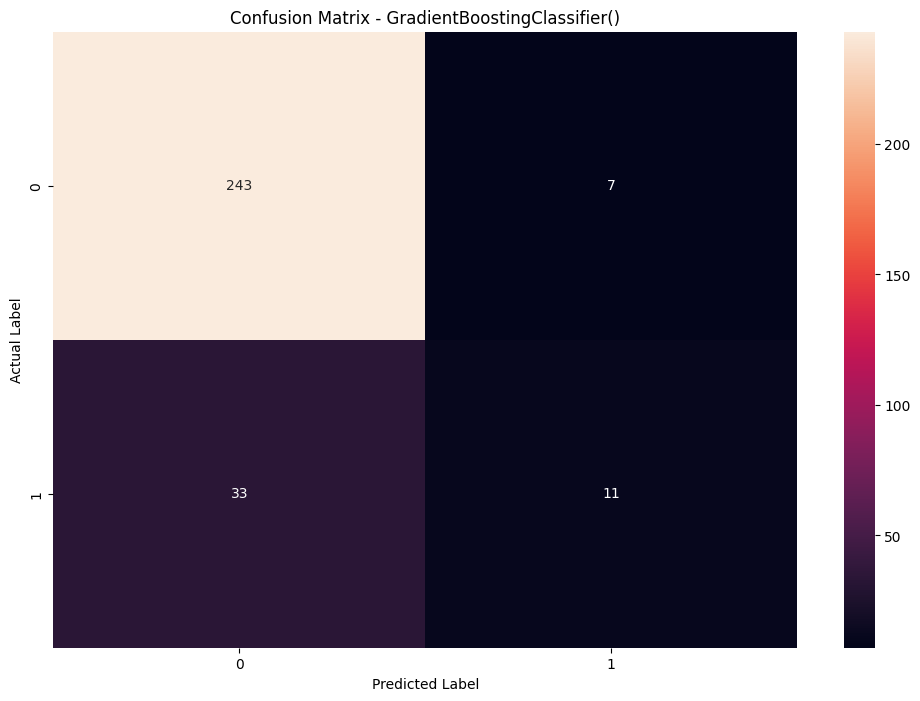

In [47]:
predict(gradientboosting)

# AdaBoost

Accuracy: 86.73%
Precision: 63.16%
Recall: 27.27%
F1_Score: 38.10%


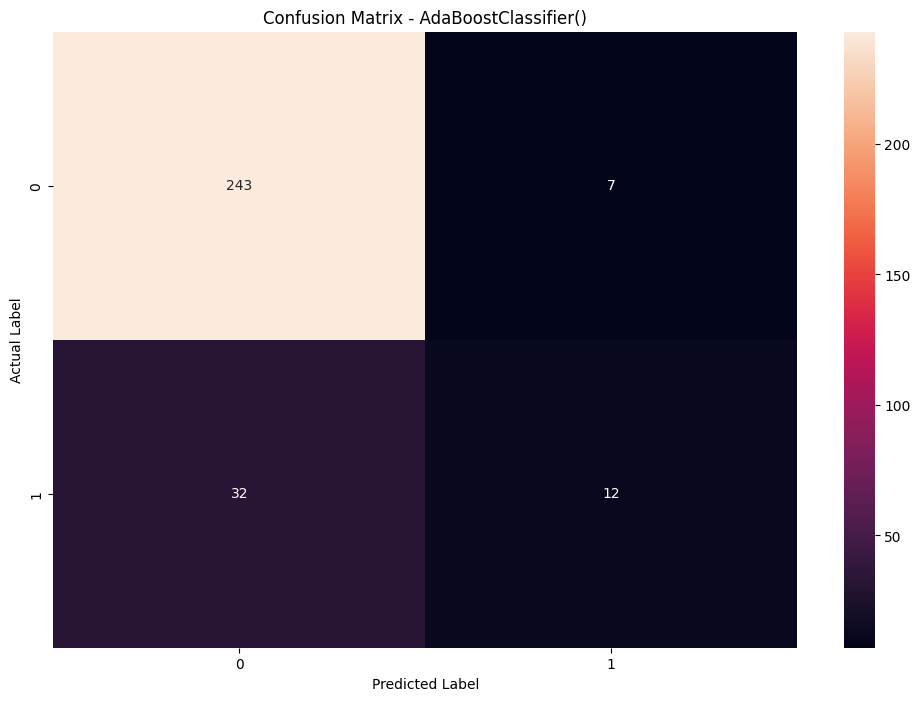

In [49]:
predict(adaboost)

# Hyperparameter Tuning using RandomizedSearchCV

In [53]:
from sklearn.model_selection import RandomizedSearchCV
randomforest_grid = {'n_estimators' : [100,150,200,250,300,350,400,450,500],
                    'max_depth':[5,1,15,20,25,30,40,50],
                    'criterion': ['gini','entropy'],
                    'min_samples_leaf':[2,5,8,10],
                    'min_samples_split': [2,5,8,10],
                    'max_features':['auto','sqrt']}
rf_tuning = RandomForestClassifier()
rf_search = RandomizedSearchCV(rf_tuning,param_distributions = randomforest_grid,
                              cv = 10, n_iter = 10, n_jobs = 1, verbose = 1, scoring = 'recall')
rf_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifi

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 1, 15, 20, 25, 30, 40,
                                                      50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 8, 10],
                                        'min_samples_split': [2, 5, 8, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   scoring='recall', verbose=1)

In [54]:
rf_search.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'entropy'}

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Accuracy: 85.37%
Precision: 57.14%
Recall: 9.09%
F1_Score: 15.69%
ROC-AUC:   0.5395


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

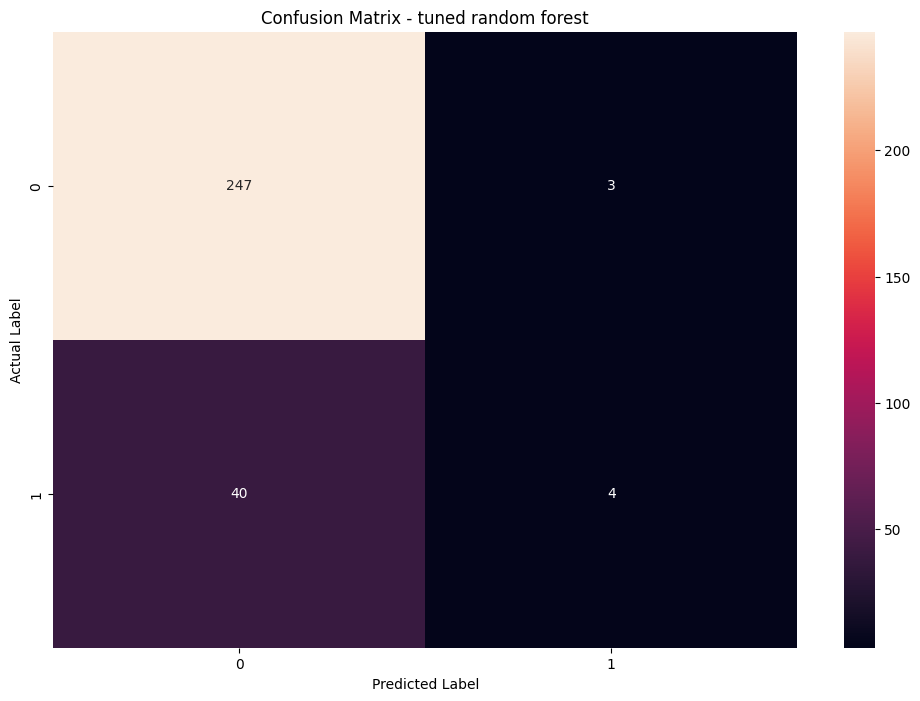

In [67]:
tuned_rf = RandomForestClassifier(**rf_search.best_params_)
tuned_rf.fit(X_train,y_train)
y_pred = tuned_rf.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred) * 100))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC:   {roc_auc:.4f}")
confusion_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - tuned random forest')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [56]:
# Tuning Ada Boost
grid = {'n_estimators' : [50,100,500,1500,2000],
       'learning_rate' : [0.05,0.1,1.0,0.15,0.2,1.5,2.0],
       'algorithm': ['SAMME', 'SAMME.R']}

adaboost = RandomizedSearchCV(AdaBoostClassifier(),
                             param_distributions = grid,
                             cv = 10,
                             n_iter = 10,
                              n_jobs = 1, 
                              verbose = 1, 
                              scoring = 'recall')
adaboost.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.05, 0.1, 1.0, 0.15,
                                                          0.2, 1.5, 2.0],
                                        'n_estimators': [50, 100, 500, 1500,
                                                         2000]},
                   scoring='recall', verbose=1)

In [57]:
adaboost.best_params_

{'n_estimators': 1500, 'learning_rate': 1.5, 'algorithm': 'SAMME'}

Accuracy: 85.03%
Precision: 50.00%
Recall: 38.64%
F1_Score: 43.59%
ROC-AUC:   0.6592


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

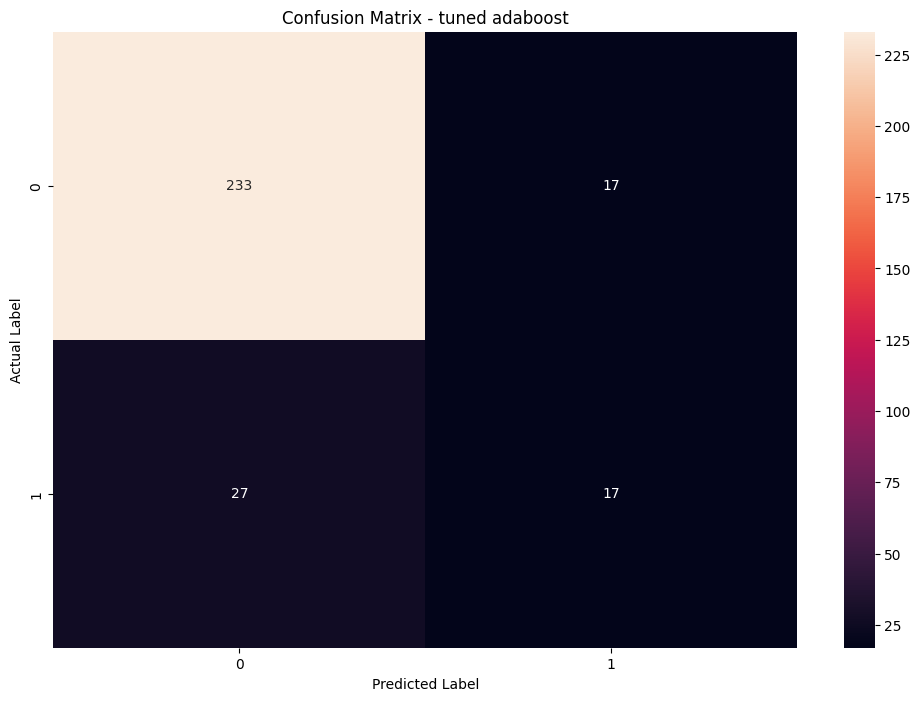

In [70]:
tuned_adaboost = AdaBoostClassifier(**adaboost.best_params_)
tuned_adaboost.fit(X_train,y_train)
y_pred = tuned_adaboost.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred) * 100))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC:   {roc_auc:.4f}")
confusion_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - tuned adaboost')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [59]:
# Tuning Gradient Boosting
grid2 = {'n_estimators':[500,1000,1500,2000,2500],
        'learning_rate':[0.01,0.05,0.2,0.1,0.15,0.3,0.5],
        'min_samples_split':[2,5,6,10],
        'min_samples_leaf':[3,5,8,12],
        'criterion': ['friedman_mse', 'squared_error', 'mse'],
        'subsample': [0.1,0.2,0.5,0.6,0.8,1.0]}

gradientboosting = RandomizedSearchCV(GradientBoostingClassifier(),
                             param_distributions = grid2,
                             cv = 10,
                             n_iter = 10, n_jobs = 1, verbose=1,
                             scoring = 'recall')
gradientboosting.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/_

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse'],
                                        'learning_rate': [0.01, 0.05, 0.2, 0.1,
                                                          0.15, 0.3, 0.5],
                                        'min_samples_leaf': [3, 5, 8, 12],
                                        'min_samples_split': [2, 5, 6, 10],
                                        'n_estimators': [500, 1000, 1500, 2000,
                                                         2500],
                                        'subsample': [0.1, 0.2, 0.5, 0.6, 0.8,
                                                      1.0]},
                   scoring='recall', verbose=1)

In [60]:
gradientboosting.best_params_

{'subsample': 0.1,
 'n_estimators': 1000,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'learning_rate': 0.1,
 'criterion': 'squared_error'}

Accuracy: 84.69%
Precision: 48.72%
Recall: 43.18%
F1_Score: 45.78%
ROC-AUC:   0.6759


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

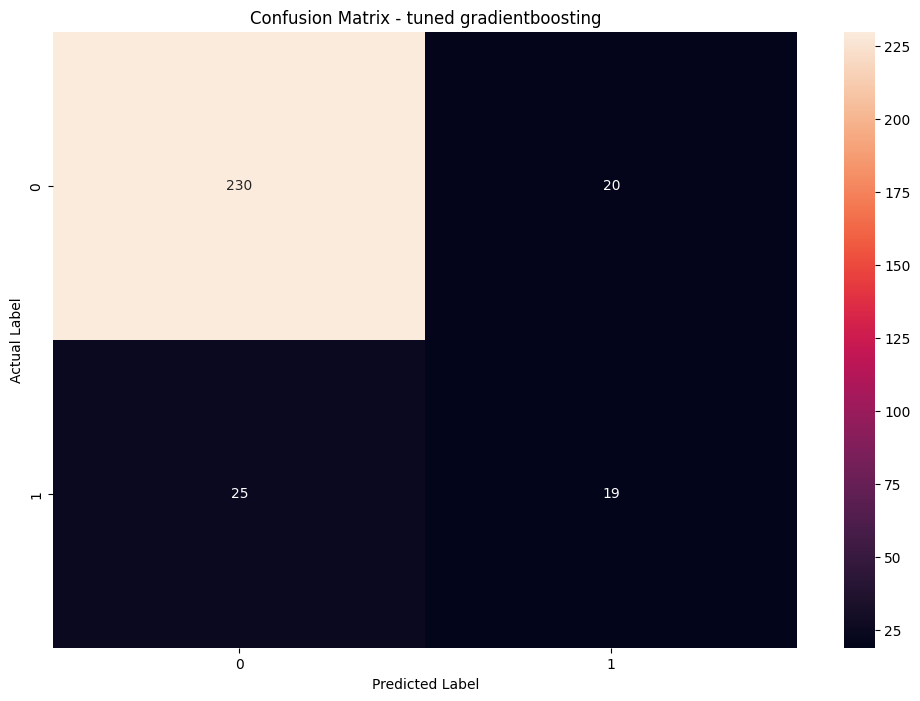

In [71]:
tuned_gradientboosting = GradientBoostingClassifier(**gradientboosting.best_params_)
tuned_gradientboosting.fit(X_train,y_train)
y_pred = tuned_gradientboosting.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred) * 100))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC:   {roc_auc:.4f}")
confusion_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - tuned gradientboosting')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

Considering all metrics, the AdaBoost model after hyperparameter tuning appears to be the best-performing model overall. It achieved the highest F1_Score (62.69%) and a good balance between precision and recall correctly predicting the largest amount of employees who were more likely to leave.